# AI BASED DIABETICS PREDICTION
#### Development-1

## IMPORT LIBRARIES

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## LOADING THE DATA

In [4]:
data = pd.read_csv("E:\diabetics\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## EXPLORATION OF DATA

### Summary Statistics

In [7]:
summary_stats = data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']].describe()
print(summary_stats)


       Pregnancies     Glucose  BloodPressure         BMI         Age
count   768.000000  768.000000     768.000000  768.000000  768.000000
mean      3.845052  120.894531      69.105469   31.992578   33.240885
std       3.369578   31.972618      19.355807    7.884160   11.760232
min       0.000000    0.000000       0.000000    0.000000   21.000000
25%       1.000000   99.000000      62.000000   27.300000   24.000000
50%       3.000000  117.000000      72.000000   32.000000   29.000000
75%       6.000000  140.250000      80.000000   36.600000   41.000000
max      17.000000  199.000000     122.000000   67.100000   81.000000


### Class Distribution

In [9]:
class_distribution = data['Outcome'].value_counts()
print(class_distribution)


Outcome
0    500
1    268
Name: count, dtype: int64


### Missing values

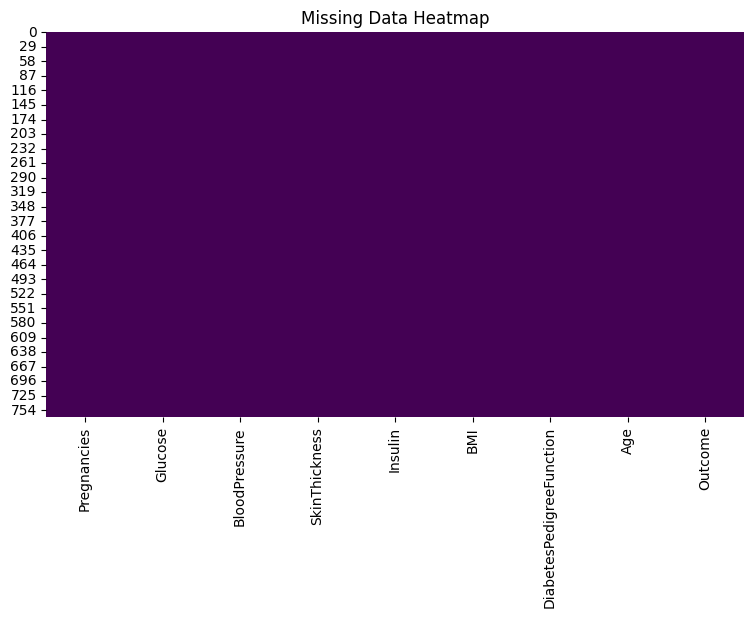

In [12]:

plt.figure(figsize=(9, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()



## DATA VISUALIZATION

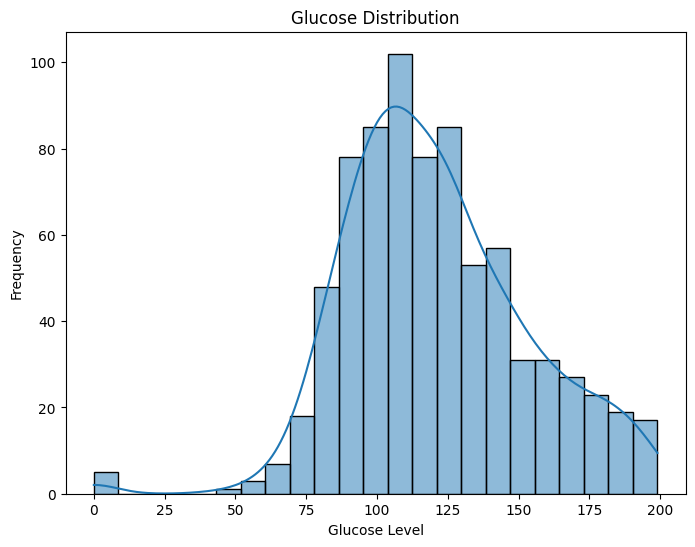

In [13]:
# Histogram for 'Glucose'
plt.figure(figsize=(8, 6))
sns.histplot(data['Glucose'], kde=True)
plt.title('Glucose Distribution')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

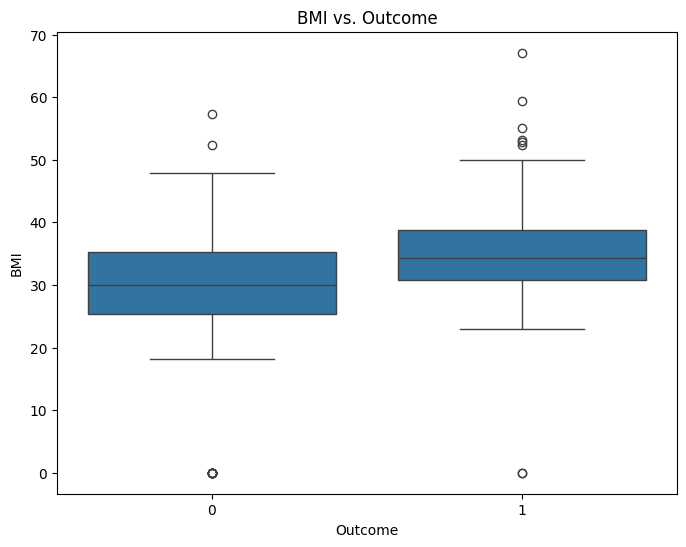

In [14]:
# Box plot for 'BMI'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Outcome', y='BMI')
plt.title('BMI vs. Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()


### Correlation Analysis

In [15]:
correlation_matrix = data.corr()
print(correlation_matrix)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

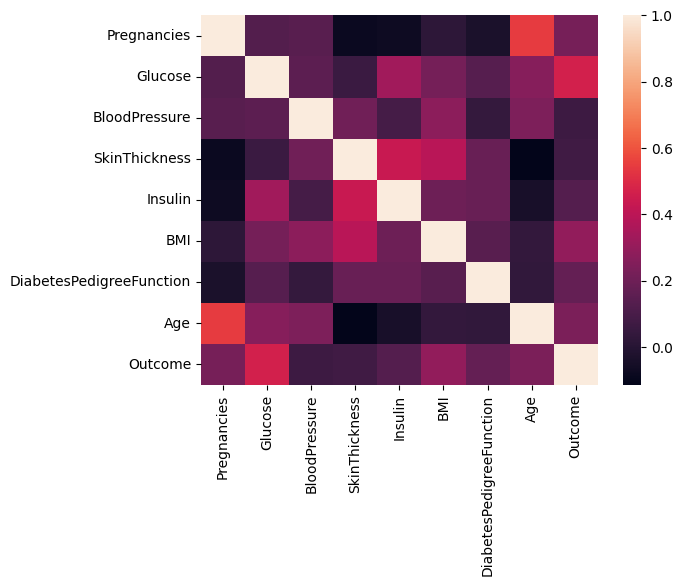

In [18]:
sns.heatmap(correlation_matrix)

### Feature Relationships

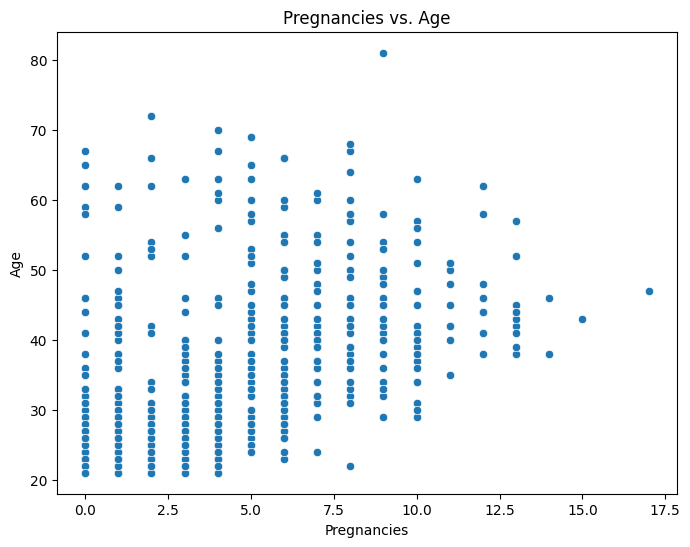

In [16]:
#relationships between 'Pregnancies' and 'Age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Pregnancies', y='Age')
plt.title('Pregnancies vs. Age')
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.show()


### Age Distribution

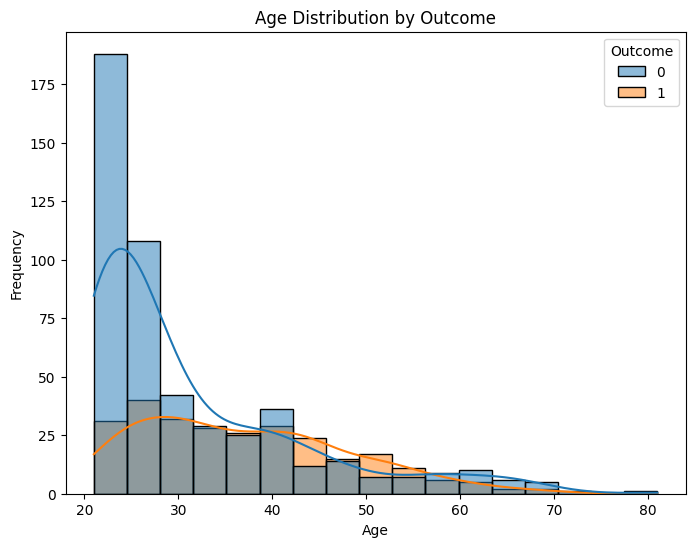

In [17]:
#distribution of 'Age' for different 'Outcome' classes
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Outcome', kde=True)
plt.title('Age Distribution by Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## PREPROCESSING THE DATA

### Feature Scaling

In [26]:

scaler = StandardScaler()
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']

data[numerical_features] = scaler.fit_transform(data[numerical_features])
print(data[numerical_features])


     Pregnancies   Glucose  BloodPressure       BMI       Age
0       0.639947  0.848324       0.149641  0.204013  1.425995
1      -0.844885 -1.123396      -0.160546 -0.684422 -0.190672
2       1.233880  1.943724      -0.263941 -1.103255 -0.105584
3      -0.844885 -0.998208      -0.160546 -0.494043 -1.041549
4      -1.141852  0.504055      -1.504687  1.409746 -0.020496
..           ...       ...            ...       ...       ...
763     1.827813 -0.622642       0.356432  0.115169  2.532136
764    -0.547919  0.034598       0.046245  0.610154 -0.531023
765     0.342981  0.003301       0.149641 -0.735190 -0.275760
766    -0.844885  0.159787      -0.470732 -0.240205  1.170732
767    -0.844885 -0.873019       0.046245 -0.202129 -0.871374

[768 rows x 5 columns]


### Visualize numerical features

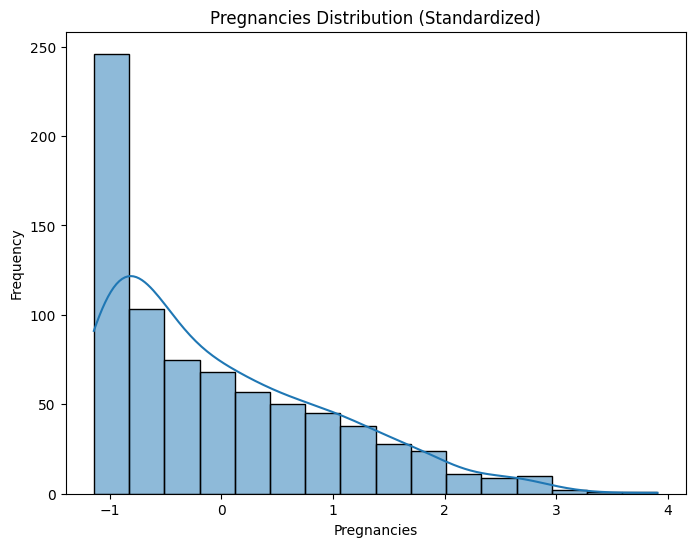

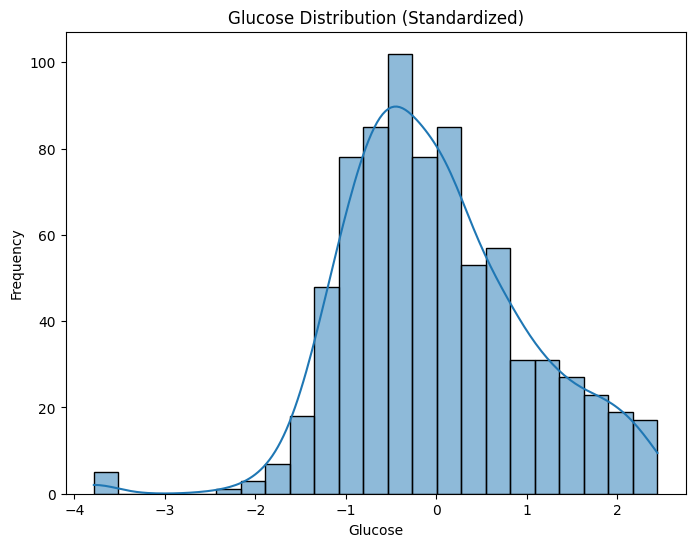

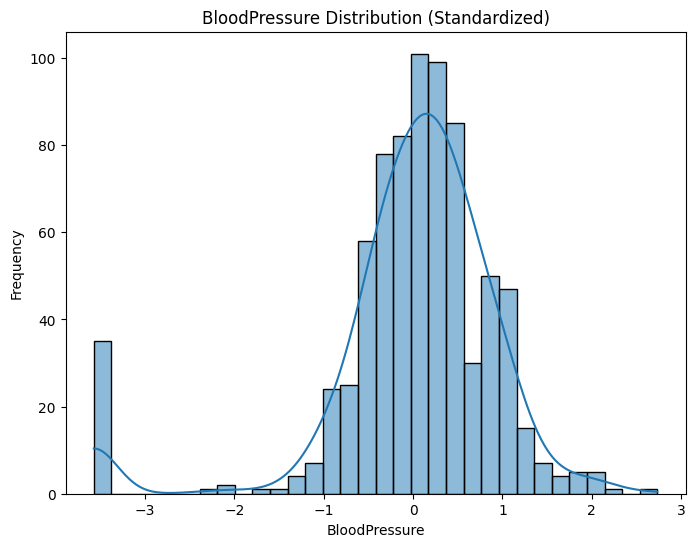

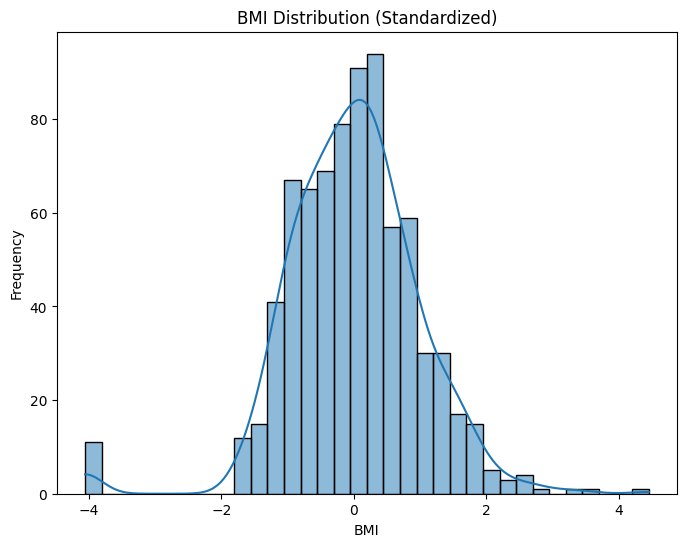

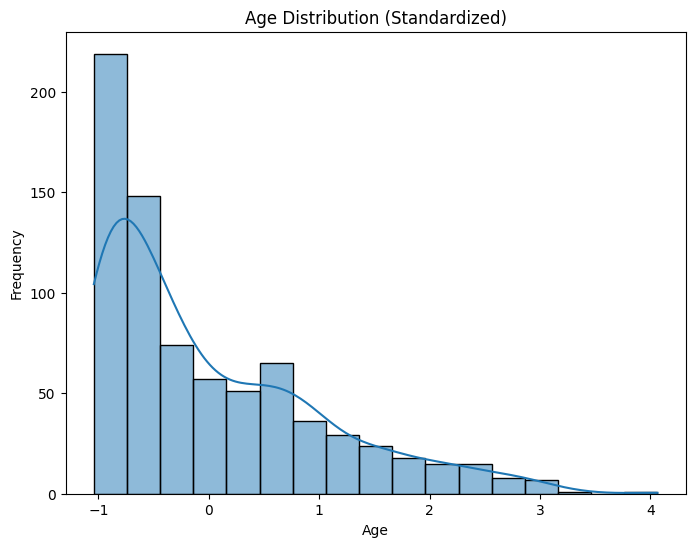

In [27]:
# Plot histograms for standardized features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} Distribution (Standardized)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### Save preprocessed data

In [28]:
# Save the preprocessed data to a new CSV file
data.to_csv('E:/diabetics/preprocessed_diabetes_data.csv', index=False)
print(data)

     Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0       0.639947  0.848324       0.149641             35        0  0.204013   
1      -0.844885 -1.123396      -0.160546             29        0 -0.684422   
2       1.233880  1.943724      -0.263941              0        0 -1.103255   
3      -0.844885 -0.998208      -0.160546             23       94 -0.494043   
4      -1.141852  0.504055      -1.504687             35      168  1.409746   
..           ...       ...            ...            ...      ...       ...   
763     1.827813 -0.622642       0.356432             48      180  0.115169   
764    -0.547919  0.034598       0.046245             27        0  0.610154   
765     0.342981  0.003301       0.149641             23      112 -0.735190   
766    -0.844885  0.159787      -0.470732              0        0 -0.240205   
767    -0.844885 -0.873019       0.046245             31        0 -0.202129   

     DiabetesPedigreeFunction       Age  Outcome  
